In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data=pd.read_csv('fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [25]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [27]:
data['has_company_logo'].value_counts()

has_company_logo
1    14220
0     3660
Name: count, dtype: int64

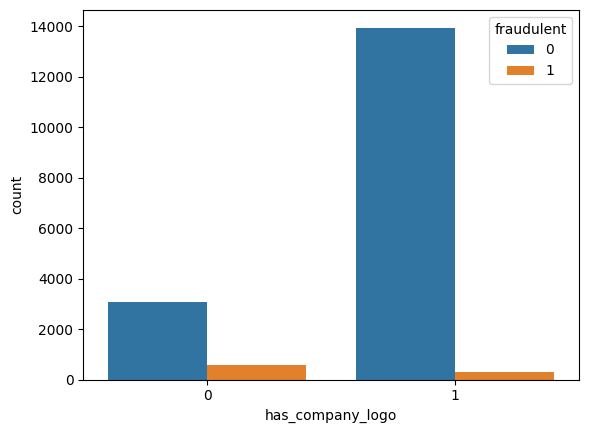

In [28]:
sns.countplot(x=data['has_company_logo'],hue=data['fraudulent'])
plt.show()

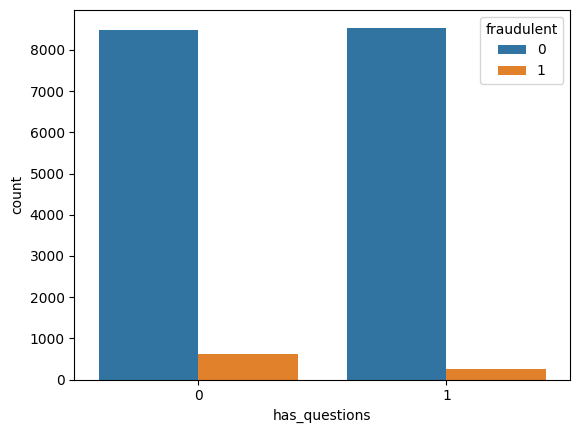

In [29]:
sns.countplot(x=data['has_questions'],hue=data['fraudulent'])
plt.show()

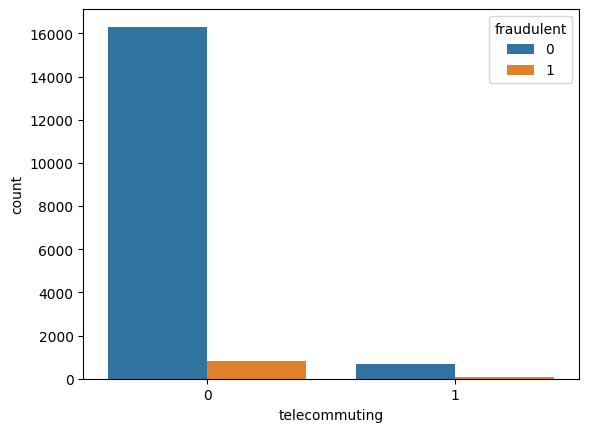

In [30]:
sns.countplot(x=data['telecommuting'],hue=data['fraudulent'])
plt.show()

--Replacing NaN/null values with whitespace' '

In [31]:
data.fillna(' ',inplace=True)

--Combining columns to get full description

In [32]:
data['text']=data['title']+' '+data['location']+' '+data['department']+' '+data['industry']+' '+data['function']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['employment_type']+' '+data['required_experience']+' '+data['required_education']

In [33]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,"Marketing Intern US, NY, New York Marketing ..."
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,"Bill Review Manager US, FL, Fort Worth Hospi..."


In [34]:
data['text'][0]

"Marketing Intern US, NY, New York Marketing   Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online 

In [35]:
df=data[['text','fraudulent']]
df.head()

,text,fraudulent
0,"Marketing Intern US, NY, New York Marketing ...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth Hospi...",0


In [36]:
X=df.drop(['fraudulent'],axis=1)
Y=df['fraudulent']

In [37]:
Y.value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [38]:
message=X.copy()

In [39]:
message=message.reset_index()

--Removing stopwords and preprocessing text(stemming) using Porter Stemmer

In [40]:
import nltk
import re
from nltk.corpus import stopwords

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
i=0
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [42]:
corpus[0]

'market intern us ny new york market market food creat groundbreak award win cook site support connect celebr home cook give everyth need one place top editori busi engin team focus use technolog find new better way connect peopl around specif food interest offer superb highli curat inform food cook attract talent home cook contributor countri also publish well known profession like mario batali gwyneth paltrow danni meyer partnership whole food market random hous food name best food websit jame beard foundat iacp featur new york time npr pando daili techcrunch today show locat chelsea new york citi food fast grow jame beard award win onlin food commun crowd sourc curat recip hub current interview full part time unpaid intern work small team editor execut develop new york citi headquart reproduc repackag exist food content number partner site huffington post yahoo buzzfe variou content manag systemsresearch blog websit provis food affili programassist day day affili program support scr

In [74]:
df1=pd.DataFrame(corpus)

In [87]:
df1.rename(columns={0:'text'},inplace=True)

In [88]:
df1['fraudulent']=Y

In [89]:
df1

,Text,fraudulent
0,market intern us ny new york market market foo...,0
1,custom servic cloud video product nz auckland ...,0
2,commiss machineri assist cma us ia wever valor...,0
3,account execut washington dc us dc washington ...,0
4,bill review manag us fl fort worth hospit heal...,0
...,...,...
17875,account director distribut ca toronto sale com...,0
17876,payrol account us pa philadelphia account inte...,0
17877,project cost control staff engin cost control ...,0
17878,graphic design ng la lago graphic design desig...,0


--Forming seperate wordcloud for real postings and fraud posting

In [90]:
from wordcloud import WordCloud

In [93]:
f_0 = WordCloud(background_color='black').generate(df[df['fraudulent']==0]['text'].str.cat(sep=' '))

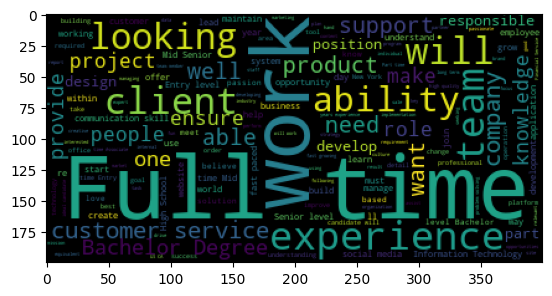

In [94]:
plt.imshow(f_0)

In [96]:
f_1 = WordCloud(background_color='black').generate(df[df['fraudulent']==1]['text'].str.cat(sep=' '))

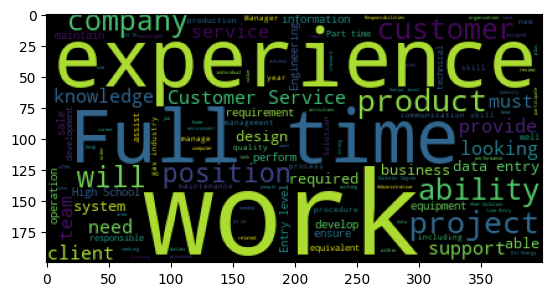

In [97]:
plt.imshow(f_1)

--To convert word to vector 'Word Embeddings' has been used

In [43]:
from tensorflow.keras.preprocessing.text import one_hot

In [44]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [45]:
voc_size=5000

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
print(onehot_repr)

In [47]:
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 882 2956   64 ... 2977 4808 4736]
 [ 605 4951 2285 ... 3405 3814  691]
 [1699 1509 3827 ... 4670 1509  472]
 ...
 [2009 4727 4259 ... 2356 3405 3814]
 [ 534  580 3795 ...  195  691 1622]
 [ 605  641 1027 ... 2452 2181 1565]]


In [48]:
embedded_docs[0]

array([ 882, 2956,   64, 4790, 3211, 2511, 3210, 4024,  695, 3404, 3534,
        515,  637, 2490, 4643,  858, 4246,   64, 1325, 4963, 3077,  198,
       4719, 1974, 1677, 4629, 4302, 4136, 3246, 2470, 3151, 1115, 4168,
       1975, 3042, 1753, 1115, 2977, 4808, 4736])

--Applying Bidirectional LSTM

In [50]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [51]:
embedding_vector_features=50
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100))) 
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 50)            250000    
                                                                 
 bidirectional (Bidirection  (None, 200)               120800    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 371001 (1.42 MB)
Trainable params: 371001 (1.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [55]:
X_data=np.array(embedded_docs)
Y_data=np.array(Y)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.25, random_state=32)

In [ ]:
--Model Training

In [58]:
model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=64)

Epoch 1/10
210/210 [==============================] - 36s 122ms/step - loss: 0.1787 - accuracy: 0.9565 - val_loss: 0.1068 - val_accuracy: 0.9700
Epoch 2/10
210/210 [==============================] - 26s 123ms/step - loss: 0.0743 - accuracy: 0.9787 - val_loss: 0.0976 - val_accuracy: 0.9754
Epoch 3/10
210/210 [==============================] - 25s 117ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0959 - val_accuracy: 0.9758
Epoch 4/10
210/210 [==============================] - 25s 119ms/step - loss: 0.0277 - accuracy: 0.9922 - val_loss: 0.1079 - val_accuracy: 0.9745
Epoch 5/10
210/210 [==============================] - 25s 117ms/step - loss: 0.0172 - accuracy: 0.9955 - val_loss: 0.1107 - val_accuracy: 0.9732
Epoch 6/10
210/210 [==============================] - 26s 125ms/step - loss: 0.0102 - accuracy: 0.9972 - val_loss: 0.1450 - val_accuracy: 0.9747
Epoch 7/10
210/210 [==============================] - 24s 116ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.1362 - val_ac

--Model Testing

In [63]:
Y_pred=model1.predict(X_test)

140/140 [==============================] - 3s 22ms/step


In [66]:
Y_pred = np.where(Y_pred > 0.5, 1, 0)
print(Y_pred)

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[4205,   42],
       [  83,  140]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9720357941834452

In [71]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4247
           1       0.77      0.63      0.69       223

    accuracy                           0.97      4470
   macro avg       0.87      0.81      0.84      4470
weighted avg       0.97      0.97      0.97      4470

